# Using Economics and Finance to Provide Perspective

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

# Two Important Macroeconomic Regularities

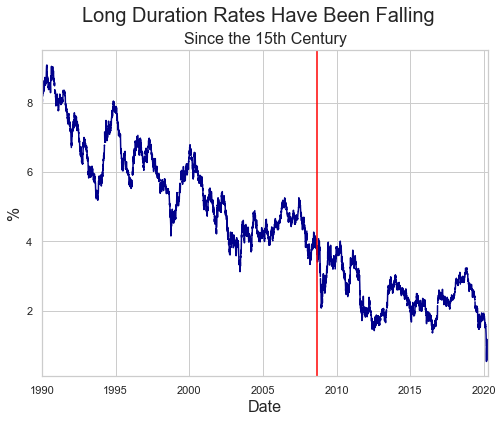

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 15th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")


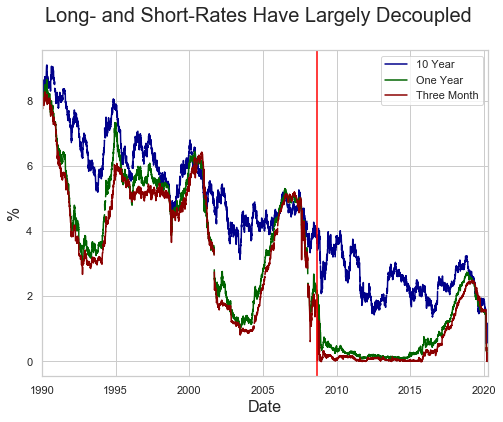

In [4]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

# The Current Climate



## Uncertainty $\approx$ Lack of Data

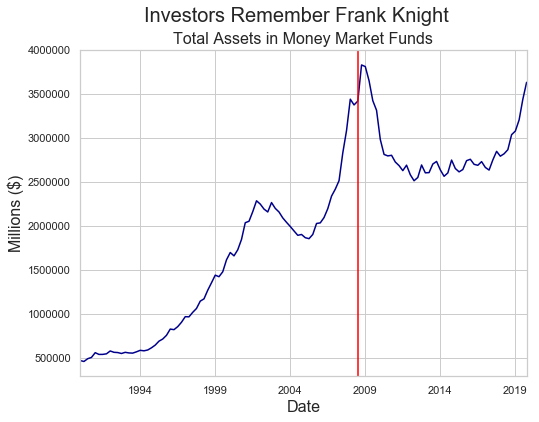

In [5]:
cash = fred.get_series("MMMFFAQ027S", observation_start='1990-01-01')
cash.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Investors Remember Frank Knight', fontsize=20)
plt.title('Total Assets in Money Market Funds', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color='black')

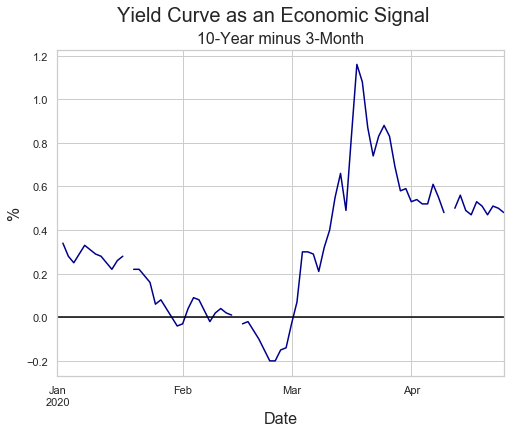

In [6]:
yield_curve = fred.get_series("T10Y3M", observation_start='2020-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve as an Economic Signal', fontsize=20)
plt.title('10-Year minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

# 1929 (Rather than 2020)

* Policy-makers had little to **little or no data** (despite policy mistakes of the Federal Reserve and law-makers of the age)
    
    
* The Cowles Commission and the National Income and Product Accounts


* Federal Reserve now relies on **real-time data** to gauge economic activity
    * Credit card **data**
    * Smart phone **data**

In [7]:
covid = pd.read_csv('https://covidtracking.com/api/us/daily.csv')
covid['date'] = pd.to_datetime(covid['date'], format='%Y%m%d')
covid = covid.sort_values('date')
covid['rate'] = covid['positive'] / covid['posNeg'] * 100
covid = covid.iloc[45:]

(array([737492., 737499., 737506., 737513., 737516., 737523., 737530.,
        737537.]), <a list of 8 Text xticklabel objects>)

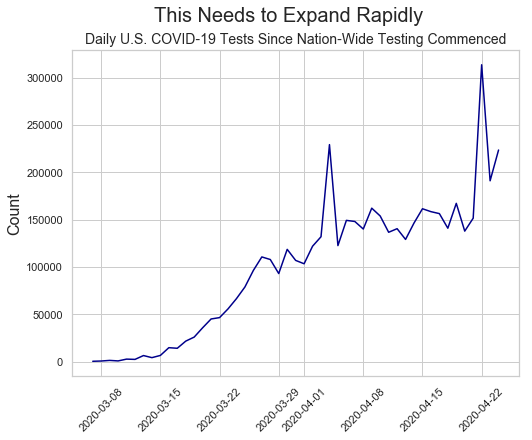

In [8]:
plt.figure(figsize=(8, 6))
plt.suptitle('This Needs to Expand Rapidly', fontsize=20)
plt.title('Daily U.S. COVID-19 Tests Since Nation-Wide Testing Commenced', fontsize=14)
plt.plot(covid['date'], covid['totalTestResultsIncrease'], color='darkblue')
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45)
# source: https://covidtracking.com/api/us/daily.csv

(array([737492., 737499., 737506., 737513., 737516., 737523., 737530.,
        737537.]), <a list of 8 Text xticklabel objects>)

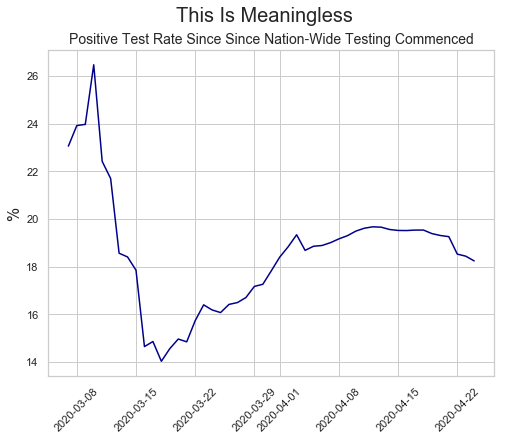

In [9]:
plt.figure(figsize=(8, 6))
plt.suptitle('This Is Meaningless', fontsize=20)
plt.title('Positive Test Rate Since Since Nation-Wide Testing Commenced', fontsize=14)
plt.plot(covid['date'], covid['rate'], color='darkblue')
plt.ylabel('%', fontsize=16)
plt.xticks(rotation=45)
# source: https://covidtracking.com/api/us/daily.csv and author's calculation

# Thank You